<a href="https://colab.research.google.com/github/Fahmidanishi/CODES/blob/main/mlp_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

##Loading the dataset


In [ ]:
(x_train,y_train),(x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

##Dataset Details

In [ ]:
unique, count = np.unique(y_train, return_counts=True)
print(unique,count)

[0 1 2 3 4 5 6 7 8 9] [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [ ]:
unique, count = np.unique(y_test, return_counts=True)
print(unique,count)

[0 1 2 3 4 5 6 7 8 9] [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


##Dataset Samples

In [ ]:
index = [10,16,1888,2000,20005]
images = x_train[index]
labels = y_train[index]

## Ploting image samples

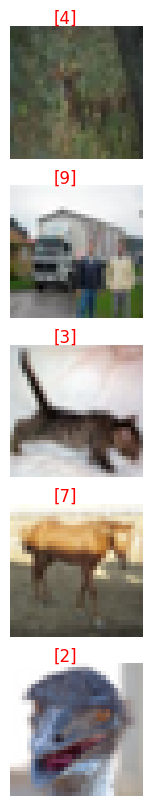

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(index)):
  plt.subplot(5,1,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.text(10,-1,labels[i],fontsize = 12,color="red")
  plt.axis('off')
plt.show()

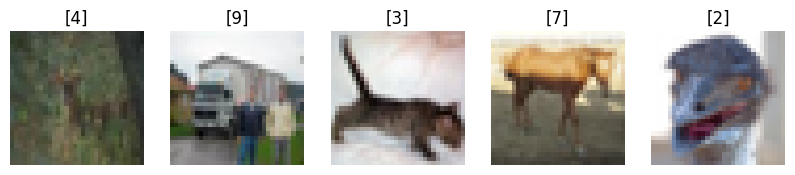

In [ ]:
plt.figure(figsize=(10,10))
for i in range(len(index)):
  plt.subplot(1,5,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.title(labels[i])
  plt.axis('off')
plt.show()

In [ ]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
input_size = x_train.shape[1]*x_train.shape[2]*x_train.shape[3] # 32*32*3
print(input_size)

3072


##Converting to 1d

In [ ]:
x_train = np.reshape(x_train,[-1 , input_size])
x_train.shape

(50000, 3072)

In [ ]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
x_test = np.reshape(x_test,[-1 , input_size])
x_test.shape

(10000, 3072)

##Normalization

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

##One hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

##Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_dim = input_size))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,068,106 (15.52 MB)

 Trainable params: 4,068,106 (15.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2561 - loss: 2.0092
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3762 - loss: 1.7308
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.4178 - loss: 1.6293
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4426 - loss: 1.5483
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4519 - loss: 1.5234
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4703 - loss: 1.4702
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4835 - loss: 1.4337
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4956 - loss: 1.4030
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5030 - loss: 1.3712
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5177 - loss: 1.3387
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5242 - loss: 1.3168
Epoch 12/20
1563/1563 ━━━━━━

In [ ]:
loss,acc = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4976 - loss: 1.5680


In [ ]:
print(loss,acc)

1.5662885904312134 0.49459999799728394
